<div class="info">
<b>PROBLEM SHEET 6:</b>    Random Numbers and Monte Carlo Simulations

Monte Carlo calculations are a class of calculations that barely existed before the advent of computers. A Monte Carlo method is a technique that involves using random numbers and probability to solve problems. The term Monte Carlo Method was coined by *S. Ulam* and *Nicholas Metropolis* in reference to games of chance, a popular attraction in Monte Carlo, Monaco (*Metropolis and Ulam, 1949*). Monte Carlo simulation is a method for iteratively evaluating a deterministic model using sets of random numbers as inputs. This method is often used when the model is complex, nonlinear, or involves more than just a couple uncertain parameters. A simulation can typically involve over 10,000 evaluations of the model, a task which in the past was only practical using super computers.

### Standard Header
As we will be utilizing a number of packages with reasonably long names, we will adopt the _de facto_ standard module abbreviations in the following header.  We also ensure that our [division behavior is sensible](http://www.python.org/dev/peps/pep-0238/) by importing from `__future__`:  _i.e._, promotion to `double` will occur from `int` or `long` data types involving division:  `1/2 == 0.5`.  Although this is the default in Python 3, it is a trivial way to help this notebook work in Python 2 if that's what you are using.

In [ ]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib widget 
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib

import numpy as np

import matplotlib.pyplot as plt

# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

## PS6 Ex1: (Marks 4/10)

Following the example given in the lecture write a program that uses a monte carlo simulation technique to estimate a value for $\pi$, the stages required for the simulation are as follows:

1. A simple algorithm to determine the desired value is produced, in this case the ratio between the area of a circle inscribed in a square and the area of the square is evaluated, $\pi R^2= 4R^2$. Or as in figure 1, does the dart land within the board or not (assuming the average skill level of a typical physicist).
2. An event is generated using random numbers to identify a position within the square
3. A simple accept/reject rule is applied to determine whether the event lies within the circle or not.
4. As the number of events increases, the uncertainty in the evaluation of $\pi$ decreases, until an acceptable level is reached.
5. Run your code for different number of events and tabulate the results.
6. Plot the relative error ( $\frac{\pi_{approx}-\pi}{\pi}$) versus the number of events to confirm the relationship that $error \propto \sqrt{N}$ (what is the best way to display this?)

<img src="dart.jpg" style="max-width:50%">

**Figure 1:** Circle inscribed in a square.


Pi estimate for 2^0 throws	0.0
Pi estimate for 2^1 throws	4.0
Pi estimate for 2^2 throws	3.0
Pi estimate for 2^3 throws	3.0
Pi estimate for 2^4 throws	3.0
Pi estimate for 2^5 throws	3.25
Pi estimate for 2^6 throws	3.0
Pi estimate for 2^7 throws	3.21875
Pi estimate for 2^8 throws	3.234375
Pi estimate for 2^9 throws	2.96875
Pi estimate for 2^10 throws	3.1015625
Pi estimate for 2^11 throws	3.123046875
Pi estimate for 2^12 throws	3.16796875
Pi estimate for 2^13 throws	3.1787109375
Pi estimate for 2^14 throws	3.13623046875
Pi estimate for 2^15 throws	3.1339111328125
Pi estimate for 2^16 throws	3.14581298828125
Pi estimate for 2^17 throws	3.148284912109375
Pi estimate for 2^18 throws	3.141265869140625
Pi estimate for 2^19 throws	3.1412429809570312
Pi estimate for 2^20 throws	3.1407928466796875


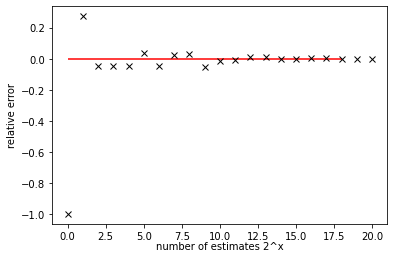

In [2]:
#PS6 Ex1:

import numpy as np
import matplotlib.pyplot as plt

# Generate empty plots
fig1 = plt.figure()
axe1 = fig1.add_subplot()

def estimate(iterations):
    """Returns the estimation for pi using a monte-carlo dartboard simulation for the given number of iterations"""
    inside_circle = 0
    throws = iterations
    for i in range(0, throws):
        dart_x = np.random.uniform(low=-1, high=1)
        dart_y = np.random.uniform(low=-1, high=1)
        if np.sqrt((dart_x**2)+(dart_y**2)) < 1:
            inside_circle += 1
    return (inside_circle / throws)*4

    
def error(estimate):
    """Returns the relative error for a given pi estimate"""
    return (estimate - np.pi)/np.pi

# Generate estimates for powers of 2
for i in range(0, 21):
    est = estimate(2**i)
    print(f"Pi estimate for 2^{i} throws\t{est}")
    axe1.plot(i, error(est), '-xk')

axe1.set_ylabel('relative error')
axe1.set_xlabel('number of estimates 2^x',labelpad=0)
axe1.hlines(0, 0, 18, 'r')
plt.show()

## PS6 Ex2: (Marks 2/10)

Write a Monte-Carlo based code to integrate the function shown in fig 2. The function represents the standard normal distribution with a mean of 0 and standard deviation of 1.

Integral estimation = 1.0053345466116104


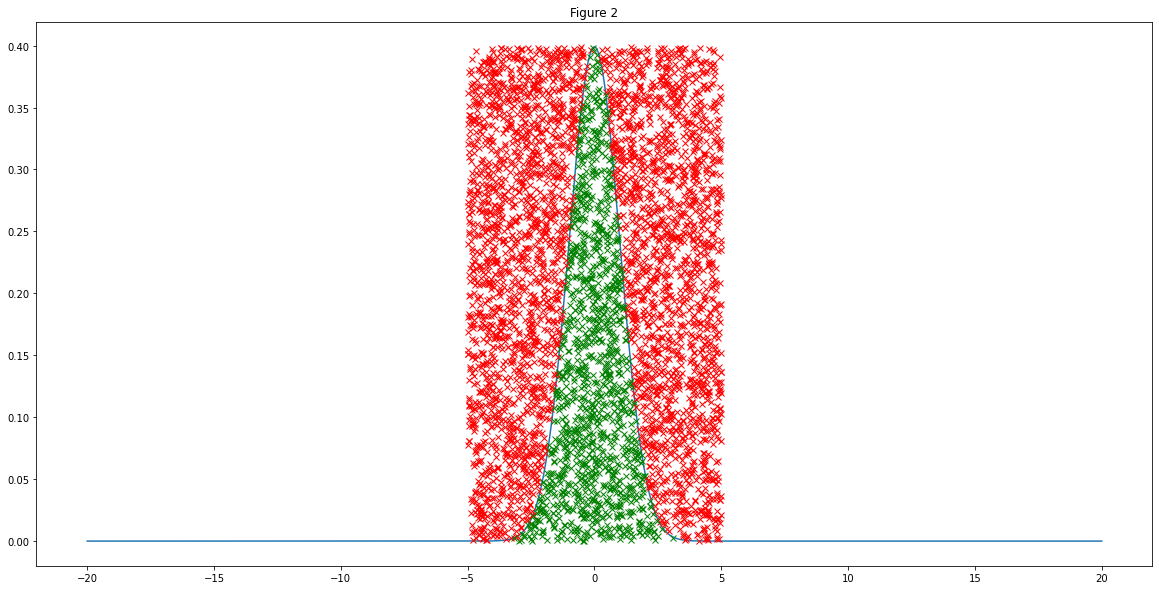

In [5]:
def Ex2_func(x):
    return ((1/ np.sqrt(2*np.pi))*np.exp(-(x**2)/2) )
X=np.linspace(-20,20,1000)
fig2=plt.figure(figsize=(20,10))
ax2=fig2.add_subplot(1, 1, 1)
ax2.set_title('Figure 2')
ax2.plot(X,Ex2_func(X))

def estimate(iterations):
    """Estimates the area under the defined curve for a given number of iterations"""
    inside_area = 0
    throws = iterations

    for i in range(0,throws):
        rand_x = np.random.uniform(low=-5, high=5)
        rand_y = np.random.uniform(low=0, high=(1/np.sqrt(2*np.pi)))
        if rand_y < Ex2_func(rand_x):
            ax2.plot(rand_x, rand_y, 'gx')
            inside_area += 1
        else:
            ax2.plot(rand_x, rand_y, 'rx')
    # Return the ratio of under/total multiplied by the range area
    return (inside_area/throws)*(10*(1/np.sqrt(2*np.pi)))
        
print(f"Integral estimation = {estimate(5000)}")

In [6]:
def norm_dist(x):
    return ((1/ np.sqrt(2*np.pi))*np.exp(-(x**2)/2) )

def estimate(iterations):
    inside_area = 0
    throws = iterations

    for i in range(0,throws):
        rand_x = np.random.uniform(low=-20, high=20)
        rand_y = np.random.uniform(low=0, high=0.4)
        if rand_y < norm_dist(rand_x):
            inside_area += 1
    return (inside_area/throws)*(40*0.4)
   
for i in range(0, 20):
    print(f"Integral estimation for 2^{i} throws\t{estimate(2**i)}")

Integral estimation for 2^0 throws	0.0
Integral estimation for 2^1 throws	0.0
Integral estimation for 2^2 throws	0.0
Integral estimation for 2^3 throws	2.0
Integral estimation for 2^4 throws	0.0
Integral estimation for 2^5 throws	0.5
Integral estimation for 2^6 throws	0.75
Integral estimation for 2^7 throws	1.125
Integral estimation for 2^8 throws	0.6875
Integral estimation for 2^9 throws	0.90625
Integral estimation for 2^10 throws	1.03125
Integral estimation for 2^11 throws	1.0546875
Integral estimation for 2^12 throws	1.13671875
Integral estimation for 2^13 throws	0.984375
Integral estimation for 2^14 throws	0.9873046875
Integral estimation for 2^15 throws	1.02197265625
Integral estimation for 2^16 throws	1.0185546875
Integral estimation for 2^17 throws	0.9901123046875
Integral estimation for 2^18 throws	1.01397705078125
Integral estimation for 2^19 throws	0.989044189453125


## PS6 Ex3: (Marks 4/10)

In this exercise you are going to use Monte-Carlo techniques to simulate photons passing through a double slit experiment. 

Consider the situation shown in figure 3
* plane parallel light is falling on a surface that contains two slits of width, $b$, separated by a distance, $d$. 
* The function that describes the probability of finding a photon at a given angle is given by,
$I(\theta)$.

$$I(\theta)\propto \rm{cos}^{2}\left[\frac{\pi d \rm{sin}(\theta)}{\lambda}\right]\rm{sinc}^{2}\left[\frac{\pi b \rm{sin}(\theta)}{\lambda}\right]$$

$$\rm{sinc}(x)= \rm{sin}(x)/x , \rm{when}~(x\neq 0), \rm{or}~ 1~ \rm{when} (x=0)$$
Try $\lambda = $550 nm,$  d=$100 $\mu$m, $b=$10 $\mu$m.


1. Need the maximum value of $I(\theta)$, occurs at $\theta=0$.
2. Compute the height of the box; the width of the box is $2\pi$ (ranging from $-\pi$ to $\pi$)
3. Throw random photons, until you get 1000 accepted photons.
4. Plot a histogram to show counts versus scattered angle (ensure the there are enough bins to see interference patterns. (note this is not the projected image on a plane, so the distance to the image plane is not required).


<img src="figure_3.png" style="max-width:50%">

**Figure 3:** Young's Double Slit Experiment.


### Some Additional code examples to help with PS6

* using histograms to sort your data
* Interpolation of discrete data set to be able to evaulate your trial function at any value in the range.

 ### Numpy.histogram
 

In [ ]:
print(help(np.histogram))

[7.88840789 9.42760943 5.77200577 5.002405   4.23280423 4.23280423
 3.27080327 4.61760462 2.88600289 3.84800385 3.84800385 2.11640212
 2.5012025  1.92400192 1.92400192 1.92400192 1.53920154 1.34680135
 0.57720058 0.76960077 0.76960077 0.96200096 1.15440115 1.34680135
 0.57720058 0.57720058 0.57720058 0.57720058 0.96200096 0.38480038
 0.38480038 0.57720058 0.38480038 0.76960077 0.38480038 0.96200096
 0.         0.76960077 0.38480038 0.76960077 0.38480038 0.19240019
 0.38480038 0.         0.19240019 0.19240019 0.38480038 0.19240019
 0.         0.19240019 0.19240019 0.19240019 0.19240019 0.19240019
 0.19240019 0.38480038 0.57720058 0.         0.         0.76960077
 0.19240019 0.38480038 0.         0.19240019 0.19240019 0.19240019
 0.         0.19240019 0.38480038 0.19240019 0.         0.19240019
 0.         0.         0.         0.         0.19240019 0.
 0.         0.         0.19240019 0.19240019 0.         0.
 0.         0.         0.         0.19240019 0.         0.
 0.         0.38480

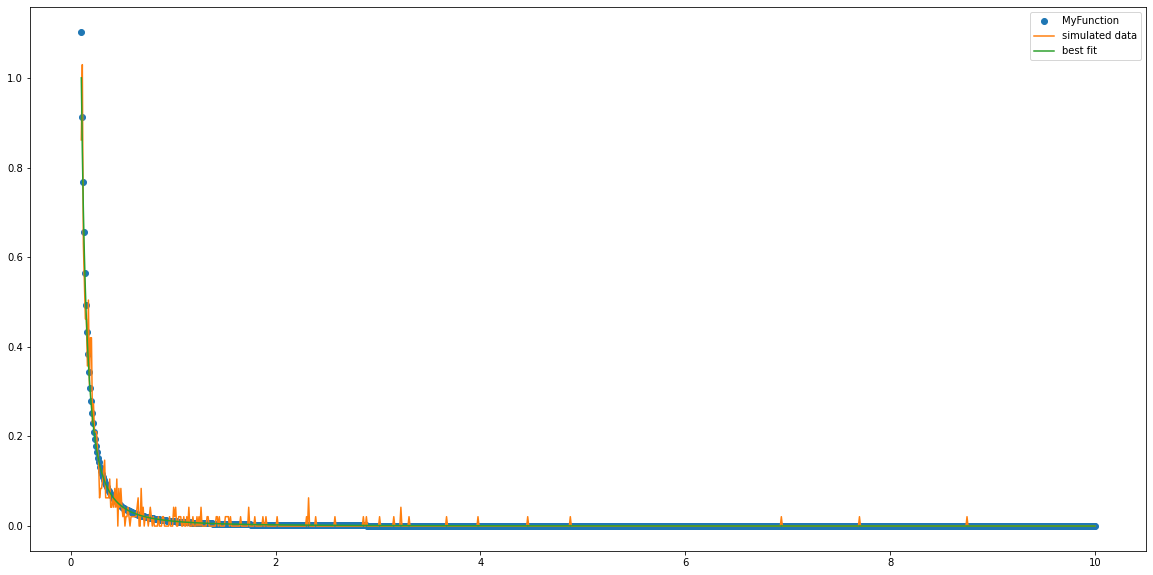

In [25]:
# An example montecarlo simulation for  a/x**2 fitting to data scaled to be 1 in the first bin of the histogram

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
fig4=plt.figure(figsize=(20,10))
ax4=fig4.add_subplot(1, 1, 1)
a=1.
def MyFunction(x,a): # defines the test function
    return a/x**2
start=0.1
end=10   
x= np.linspace(start,end,1000)
y= MyFunction(x,a)/MyFunction(start+0.005,a) #scaling the test function to equal 1 at the centre of the first bin in the histogram of simulated data
plt.plot(x,y,'o',label='MyFunction')
n=1000
z=np.zeros(n)
k=0
while k<n: # generates an array of n values where a value of x is appended to the array if condition is met
    px=np.random.rand(1)*end
    py = np.random.rand(1)*MyFunction(0.1,a)
    if py< MyFunction(px,a): # condition that point is added to array if random number < scaled function evaluated at x
        z[k]=px
        k+= 1
        
                    
hist, bin_edges=np.histogram(z,1000,range=(start,end),density=True)# histogram sorts z into bins, density = True
print (hist)
bin_middle=np.zeros(np.size(hist)) # histogram function returns bin edges, the next bit of code converts to bin middle
for n in range (0,len(hist)):
    bin_middle[n]=((bin_edges[n]+bin_edges[n+1])/2)
#scaledhist=hist/hist[0]


popt, pcov = curve_fit(MyFunction, bin_middle, hist)#curve fit to simulated data
scaledhist=hist/MyFunction(bin_middle[0],popt[0])
ax4.plot(bin_middle,scaledhist, label='simulated data')

ax4.plot(bin_middle, MyFunction(bin_middle,popt[0])/MyFunction(bin_middle[0],popt[0]), label='best fit')
print (popt * MyFunction(bin_middle[0],popt[0]))
print (pcov)
ax4.legend()
plt.show()


### Interpolation

One of the problems that you will encounter when working discrete data sets will be, for example how do you decide if your simulated value is above/below a curve if your random point does not match up with a value in your data file.  Here the data file will not have values for $f(x)$ at the randomly generated value of $x$, and you do not have a functional form of the equation such that you could evaluate the function at any arbitrary value.

One simple solution is to use the *scipy.interpolate* package to generate a new value of *f* in-between the values that you have already. The following code example fits using some data from the CRXO website and *scipy.interpolate.interp1d* to interpolate both *linearly* and using a *cubic spline* fit to evaluate the function at some arbitrary values of *E*. An alternative would be to use *curve_fit* with a trial function (maybe a higher order polynomial to fit the whole data set), or to divide the data up into bins in $E$, and assign a mean value if $f$.


In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

sd=np.loadtxt('ray.txt')# data from http://henke.lbl.gov/optical_constants/bend2.html

x=sd[:,0]
y=sd[:,1]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
z=[100.1,150.7,1001.3,2007.5,2300.1,9500.1]

fig5=plt.figure()
ax5=fig5.add_subplot(1, 1, 1)
ax5.scatter(x,y, label='data')
ax5.scatter(z,f(z),c='g',label='linear')
ax5.scatter(z,f2(z),c='r',label='cubic')
ax5.legend()


In [ ]:
#ignore this, it's something that helps styling the notebook.
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()